In [2]:
# This notebook is to demonstrate how to run the Classification Model
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt# library to perform visualization in python
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression

#Import the metrics to measure the performance of the model, here the problem statement is classification, so we import the classification problem metrics
from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score,roc_auc_score,roc_curve\


In [3]:
os.chdir("C://Users//avinash//Downloads")# Set it to your  local drive
customer_df=pd.read_csv('customersdata.csv')# Command to read the dataset
customer_df['Fraudulent']=customer_df['Fraudulent'].replace({False:0,True:1})
customer_df

,Document Index (generated),Number of Records per customersdata.json,Number of Records,Customer Billing Address,Customer Device,Customer Email,Customer IP Address,Customer Phone,Fraudulent,Order Amount,...,paymentMethodId (transactions),Payment Method Issuer,Payment Method Provider,Payment Method Registration Failure,Payment Method Type,paymentMethods Index (generated),Transaction Amount,Transaction Failed,Transaction Id,transactions Index (generated)
0,1,1,1,"5493 Jones Islands\r\nBrownside, CA 51896",yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415,0,18.0,...,wt07xm68b,Citizens First Banks,JCB 16 digit,True,card,1.0,18.0,False,a9lcj51r,1.0
1,1,1,1,"5493 Jones Islands\r\nBrownside, CA 51896",yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415,0,26.0,...,wt07xm68b,Citizens First Banks,JCB 16 digit,True,card,1.0,18.0,False,a9lcj51r,1.0
2,1,1,1,"5493 Jones Islands\r\nBrownside, CA 51896",yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415,0,18.0,...,wt07xm68b,Citizens First Banks,JCB 16 digit,True,card,1.0,26.0,False,y4wcv03i,2.0
3,1,1,1,"5493 Jones Islands\r\nBrownside, CA 51896",yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415,0,26.0,...,wt07xm68b,Citizens First Banks,JCB 16 digit,True,card,1.0,26.0,False,y4wcv03i,2.0
4,2,1,1,356 Elizabeth Inlet Suite 120\r\nPort Joshuabu...,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,1,45.0,...,41ug157xz,Solace Banks,VISA 16 digit,True,bitcoin,1.0,45.0,False,5mi94sfw,1.0
5,2,1,1,356 Elizabeth Inlet Suite 120\r\nPort Joshuabu...,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,1,23.0,...,41ug157xz,Solace Banks,VISA 16 digit,True,bitcoin,1.0,45.0,False,5mi94sfw,1.0
6,2,1,1,356 Elizabeth Inlet Suite 120\r\nPort Joshuabu...,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,1,43.0,...,41ug157xz,Solace Banks,VISA 16 digit,True,bitcoin,1.0,45.0,False,5mi94sfw,1.0
7,2,1,1,356 Elizabeth Inlet Suite 120\r\nPort Joshuabu...,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,1,45.0,...,41ug157xz,Vertex Bancorp,VISA 16 digit,False,card,2.0,45.0,False,5mi94sfw,1.0
8,2,1,1,356 Elizabeth Inlet Suite 120\r\nPort Joshuabu...,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,1,45.0,...,41ug157xz,His Majesty Bank Corp.,Diners Club / Carte Blanche,False,card,3.0,45.0,False,5mi94sfw,1.0
9,2,1,1,356 Elizabeth Inlet Suite 120\r\nPort Joshuabu...,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,1,45.0,...,41ug157xz,Vertex Bancorp,Mastercard,False,card,4.0,45.0,False,5mi94sfw,1.0


In [5]:
y=customer_df['Fraudulent'] # Assigning the target variable to a new variable

# dropping the target variable from the dataset. 
customer_df=customer_df.drop(columns=['Fraudulent','Document Index (generated)'])

cols_to_convert=['orders Index (generated)','paymentMethods Index (generated)','transactions Index (generated)','Number of Records','Number of Records per customersdata.json']

for col in cols_to_convert:
    customer_df[col]=customer_df[col].astype('object')# it is used to change the continous to categorical

In [6]:
#creating list for numeric cols
num_cols=[col for col in customer_df.columns if customer_df[col].dtype=='int64' or customer_df[col].dtype=='float64']

#creating list for categorical columns
cat_cols=[col for col in customer_df.columns if customer_df[col].dtype=='object']

In [7]:
na_df=pd.DataFrame({"columns_name":customer_df.columns,
                    "NA_Count":customer_df.isnull().sum(),
                    "NA_Percentage":customer_df.isnull().sum()/customer_df.shape[0]*100})
na_df#created a dataframe for check the missing values in the customer_df
na_df.sort_values(by="NA_Percentage",ascending=False)

,columns_name,NA_Count,NA_Percentage
orders Index (generated),orders Index (generated),30,0.455927
orderId (transactions),orderId (transactions),30,0.455927
Transaction Id,Transaction Id,30,0.455927
Transaction Failed,Transaction Failed,30,0.455927
Transaction Amount,Transaction Amount,30,0.455927
paymentMethodId (transactions),paymentMethodId (transactions),30,0.455927
Order State,Order State,30,0.455927
Order Shipping Address,Order Shipping Address,30,0.455927
transactions Index (generated),transactions Index (generated),30,0.455927
orderId (orders),orderId (orders),30,0.455927


In [8]:
# This command splits the data set into training & testing sets
X_train,X_test,y_train,y_test=train_test_split(customer_df,y,test_size=0.2,random_state=40)


In [9]:
#num_cols=[col for col in X_train.columns if X_train[col].dtype=="int64" or X_train[col].dtype=="float64"]   
for ele in num_cols:
    X_train[ele]=X_train[ele].fillna(X_train[ele].mean())#filling the missing values for numerical columns using mean.
    X_test[ele]=X_test[ele].fillna(X_train[ele].mean())

In [10]:
for ele in cat_cols:
    X_train[ele]=X_train[ele].fillna(X_train[ele].mode()[0]).astype('str')#filling the missing values for categorical values using mode.
    X_test[ele]=X_test[ele].fillna(X_train[ele].mode()[0]).astype('str')
    
X_train[cat_cols].dtypes

Number of Records per customersdata.json    object
Number of Records                           object
Customer Billing Address                    object
Customer Device                             object
Customer Email                              object
Customer IP Address                         object
Customer Phone                              object
orderId (orders)                            object
orderId (transactions)                      object
Order Shipping Address                      object
Order State                                 object
orders Index (generated)                    object
paymentMethodId (paymentMethods)            object
paymentMethodId (transactions)              object
Payment Method Issuer                       object
Payment Method Provider                     object
Payment Method Registration Failure         object
Payment Method Type                         object
paymentMethods Index (generated)            object
Transaction Failed             

In [11]:
class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)

In [12]:
label=LabelEncoderExt()#Here converting the categorical columns to numerical cols to fit the model

for ele in cat_cols:
    label.fit(X_train[ele])
    X_train[ele]=label.transform(X_train[ele])
    X_test[ele]=label.transform(X_test[ele])
    


In [13]:
scaler=StandardScaler()

for ele in num_cols:
    X_train[ele]=scaler.fit_transform(np.array(X_train[ele]).reshape(-1,1))
    X_test[ele]=scaler.transform(np.array(X_test[ele]).reshape(-1,1))  
    
X_train.isnull().sum()

Number of Records per customersdata.json    0
Number of Records                           0
Customer Billing Address                    0
Customer Device                             0
Customer Email                              0
Customer IP Address                         0
Customer Phone                              0
Order Amount                                0
orderId (orders)                            0
orderId (transactions)                      0
Order Shipping Address                      0
Order State                                 0
orders Index (generated)                    0
paymentMethodId (paymentMethods)            0
paymentMethodId (transactions)              0
Payment Method Issuer                       0
Payment Method Provider                     0
Payment Method Registration Failure         0
Payment Method Type                         0
paymentMethods Index (generated)            0
Transaction Amount                          0
Transaction Failed                

In [14]:
log_reg=LogisticRegression()# instantiating the model, log_reg is the object

# Training the model on the train data
log_reg.fit(X_train,y_train)

# Predict on the test data
y_pred=log_reg.predict(X_test)

#Generate the confusion Matrix 
confusion_matrix(y_test,y_pred)

array([[370, 182],
       [146, 618]], dtype=int64)

In [15]:
accuracy_score(y_test,y_pred)

0.7507598784194529

In [15]:
precision_score(y_test,y_pred)

0.7725

In [16]:
recall_score(y_test,y_pred)

0.8089005235602095

In [17]:
from sklearn.metrics import f1_score

f1_score(y_test,y_pred)

0.7902813299232738

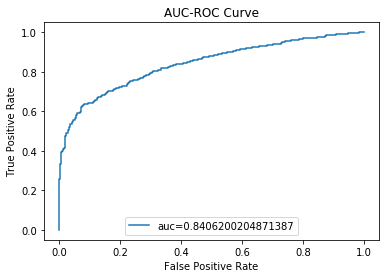

In [18]:
y_pred_proba=log_reg.predict_proba(X_test)[::,1]

fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba) # the function roc_curve returns three values, the False Positive Rate,True Positive rate
                                                # threshold values it used to calculate the TPR and FPR

auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend(loc=8)
plt.show()

In [16]:
from sklearn.tree import DecisionTreeClassifier

#Import GridSearchCV,RandomizedSearchCV for Hyperparameter Tunning 
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [17]:
tree=DecisionTreeClassifier()# instantiating the model, tree is the object
parmeter={"criterion":["entropy"],#consider few parameter 
          "max_depth":[5,6,7,8,9],
          "min_samples_split":[3,4,5,6,7],
          "min_samples_leaf":[1,2,3,4,5]}

In [26]:
rd_cv=RandomizedSearchCV(estimator=tree,param_distributions=parmeter,cv=5,n_iter=10)

rd_cv.fit(X_train,y_train)

print(rd_cv.best_params_)

print(rd_cv.best_score_)

{'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 8, 'criterion': 'entropy'}
0.8900075987841946


In [18]:
gd_cv=GridSearchCV(estimator=tree,param_grid=parmeter,cv=15)

gd_cv.fit(X_train,y_train)

print(gd_cv.best_params_)

print(gd_cv.best_score_)

print(gd_cv.best_estimator_)

print(gd_cv.best_index_)

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 3}
0.956306990881459
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
100


In [28]:
tree=DecisionTreeClassifier(criterion='entropy',max_depth=9,min_samples_leaf=1,min_samples_split=3,random_state=40)
tree.fit(X_train,y_train)
y_pred1=tree.predict(X_test)

In [29]:
confusion_matrix(y_test,y_pred1)

array([[545,   7],
       [  9, 755]], dtype=int64)

In [30]:
f1_score(y_test,y_pred1)

0.9895150720838795

In [31]:
accuracy_score(y_test,y_pred1)

0.9878419452887538

In [32]:
recall_score(y_test,y_pred1)

0.9882198952879581

In [33]:
precision_score(y_test,y_pred1)

0.9908136482939632

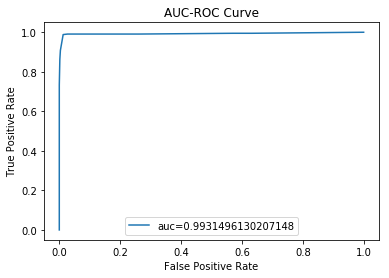

In [34]:
y_pred_proba1=tree.predict_proba(X_test)[::,1]

fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba1)

auc = roc_auc_score(y_test, y_pred_proba1)

plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend(loc=8)
plt.show()

In [35]:
clf=RandomForestClassifier()# instantiating the model, clf is the object
parameter={"bootstrap":True,
           "criterion":["entropy"],
           "max_depth":[10,11,12,13,14,15],
           "min_samples_split":[1,2,3,4,5],
           "min_samples_leaf":[5,6,7,8,9],
           "random_state":10}

In [36]:
rd_cv=RandomizedSearchCV(estimator=clf,param_distributions=parmeter,cv=10, n_iter=60)

rd_cv.fit(X_train,y_train)

print(rd_cv.best_params_)

print(rd_cv.best_score_)

{'min_samples_split': 7, 'min_samples_leaf': 3, 'max_depth': 8, 'criterion': 'entropy'}
0.9741641337386018


In [137]:
gd_cv=GridSearchCV(estimator=clf,param_grid=parmeter,cv=10)

gd_cv.fit(X_train,y_train)

print(gd_cv.best_params_)

print(gd_cv.best_score_)

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 7}
0.9840425531914894


In [38]:
clf=RandomForestClassifier(bootstrap=True,criterion='entropy',max_depth=9,min_samples_leaf=2,min_samples_split=7)
clf.fit(X_train,y_train)
y_pred2=clf.predict(X_test)

In [139]:
print(confusion_matrix(y_test,y_pred2))

[[549   3]
 [ 26 738]]


In [39]:
print(f1_score(y_test,y_pred2))

0.9895013123359581


In [140]:
print(accuracy_score(y_test,y_pred2))

0.9779635258358662


In [141]:
print(recall_score(y_test,y_pred2))

0.9659685863874345


In [142]:
print(precision_score(y_test,y_pred2))

0.9959514170040485


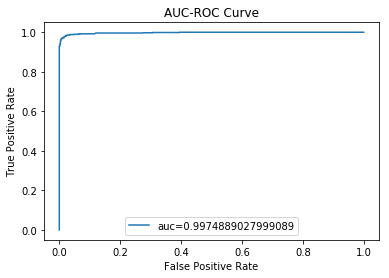

In [143]:
y_pred_proba2=clf.predict_proba(X_test)[::,1]

fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba2)

auc = roc_auc_score(y_test, y_pred_proba2)

plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend(loc=8)
plt.show()

In [ ]:
##Inferences:
   ##from the above Model we can analysis these variables are most important to the output variable 
   ##variables:customer mail,customer IP address,order amount,order id (transcations),payement method issuer,provider,type,Transcation amount